<a href="#Overview"></a>
# Overview
* <a href="#7715e1f2-2926-42a1-8cc3-1cbf1acc905a">Permutation tests</a>
  * <a href="#1cd64aa5-c17e-48d1-aa7b-0fc110af6be0">How does arousal impact neural coding in auditory cortex?</a>
    * <a href="#ab4b7120-4dd9-41bd-aa5c-4f7d33f9fa61">Function list</a>
* <a href="#ab922e84-3211-4c9f-a9a5-d029c8ea6872">Load the data</a>
  * <a href="#dc42f280-ab26-406e-83be-2d636f45a285">Exercise 1: load the correct files</a>
    * <a href="#8533990e-736b-4ee2-b88e-18c836be157b">Get to know your data</a>
* <a href="#f531f4ce-af78-4bdf-8155-883771def50d">Plot state-dependent PSTHs</a>
  * <a href="#c226298d-1768-4018-ba0d-a8eeb8bd037e">Exercise 2: compute mean pupil per trial</a>
  * <a href="#d2b9d1e5-ff9c-4358-990c-ed6649f78e8f">Exercise 3: compute average response in each pupil group</a>
    * <a href="#c0f1b58e-68b5-4588-be4d-fd075de1e3b2">Exercise 4: fix the x axis</a>
* <a href="#13b7af37-6dc3-486e-ad28-212ac87d7a79">Comparing mean evoked spike rate</a>
  * <a href="#4f094be8-7523-4fbb-b6cd-b92a4bce69b7">Exercise 5: compute mean evoked rate on each trial</a>
  * <a href="#aee3912b-3435-4741-9e55-29e48c2806da">Exercise 6: compare response histograms</a>
* <a href="#a623b812-038c-45d8-b90d-b9761e91faaf">Permute!</a>
  * <a href="#12d44766-1253-4834-9c36-c1e786bc668f">Exercise 7: do the shuffle</a>
  * <a href="#3cf0469f-d231-4dae-baec-c070bb0ba92d">Exercise 8: multiple permutations</a>
* <a href="#e0585c21-27c5-4c6e-93e0-11b01825991d">Write a function to save time and space</a>
  * <a href="#8e91c3c6-8016-4181-aff6-47f0687ed4b7">Exercise 9: write a permutation test function</a>
* <a href="#6568c72a-e3f7-44b3-90a5-42f764499447">Permutation test for an arbitrary measurement</a>
  * <a href="#317812bc-5e59-4a28-a6c9-69df0c6b7946">Correlation coefficient</a>
  * <a href="#9ab41349-5145-4fba-850e-f32a48f134f3">Generate a custom metric function</a>
  * <a href="#a48a1233-3876-4811-a1a1-b334b11a5757">Exercise 10: custom correlation coefficient function</a>
* <a href="#78c5bbbe-3a72-4113-ac99-d7336804899a">Existing resources for permutation statistics</a>

<a id="7715e1f2-2926-42a1-8cc3-1cbf1acc905a"></a>
# Permutation tests
<a href="#Overview">Return to overview</a>

<a id="1cd64aa5-c17e-48d1-aa7b-0fc110af6be0"></a>
## How does arousal impact neural coding in auditory cortex?
<a href="#Overview">Return to overview</a>

It is well-known that evoked spiking responses of neurons in sensory cortex are variable from trial to trial. Put another way, the same neuron will respond with different numbers of spikes to repeated presentations of identical sensory stimuli. Recently, one source of trial-to-trial variability that has been identified is arousal, as measured by pupil size. This notebooks illustrates analysis of how pupil-indexed arousal affects neural spiking, using data from Schwartz et al. <i>J Neurophys.</i> 2020.

To study this problem, we record spiking activity from one or more single neurons in ferret auditory cortex while repeatedly presenting the same natural vocalization and using IR video to continuously measure pupil size. Here's a recording of pupil size from one experiment. Can you see where the experimenter presented an unexpected stimulus to "wake up" the animal?

<p style="text-align: center;"><img src="images/pupil_method.jpeg" alt="drawing" width="500"/></p>

Here is activty of a neuron recorded during this experiment that appears to be modulated by changes in pupil. The sound spectrogram is plotted at the top, with time-ordered raster in the middle. The same data, but with rows sorted by pupil size, appears at the bottom.

<p style="text-align: center;"><img src="images/pupil_example_raster.jpeg" alt="drawing" align="center" width="500"/></p>

Today, we will use basic stastical methods for quantifying if and how pupil size impacts spiking activity. An important aspect of this presentation is appreciating that traditional statistical methods assuming Gassian (bell curve-shaped) data distributions, don't necessarily apply to neural spiking data. Instead, we employ permutation methods, which are robust to non-Gaussian data. As we get started, we'll also practice some other basic approaches to manipulating and visualizing reshaping numpy arrays.

<a id="ab4b7120-4dd9-41bd-aa5c-4f7d33f9fa61"></a>
### Function list
<a href="#Overview">Return to overview</a>

Numpy
* `np.loadtxt`
* `np.flatten`
* `np.transpose`
* `np.sqrt`
* `np.std`
* `np.stack`
* `np.random.permutation`
* `np.corrcoef`

Matplotlib (these are not central to today's presentation but are good to know about).
* `plt.subplots`
* `plt.errorbar`
* `plt.hist`

Scipy
* `scipy.stats.wilcoxon`

<a id="ab922e84-3211-4c9f-a9a5-d029c8ea6872"></a>
# Load the data
<a href="#Overview">Return to overview</a>


First, import the requisite libraries. You should already have all these installed in your Anaconda environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
import os.path

<a id="dc42f280-ab26-406e-83be-2d636f45a285"></a>
## Exercise 1: load the correct files
<a href="#Overview">Return to overview</a>

Data from a few neurons has been stored in `csv` files in the `data/` subdirectory. See if you can find the files containing spike and pupil data for neuron `eno052d-a1`. Use the numpy `loadtxt` command to read them in. Load the spike data into an array `spikes` and pupil data into `pupil`

In [8]:
# %load "answers/answer_001.txt"
# Answer
spikes = np.loadtxt('data/eno052d-a1_spikes.csv', delimiter=",")
pupil = np.loadtxt('data/eno052d-a1_pupil.csv', delimiter=",")

If you loaded correctly, you should now see that the arrays contain the spikes count or pupil size, respectively. There are 55 samples per trial and 120 trials.

In [9]:
print(spikes.shape)
print(pupil.shape)

(55, 120)
(55, 120)


A couple notes about the data. The matrices record the data in the order they were collected. Sampling is 10 Hz, so each data point reflects the number of spikes or pupil size during a 100 ms period. Consistent with the figure above, each trial consists of a 2-sec pre-stimulus silent period, 3 seconds of sound, 0.5-sec post-stimulus silence. 

<a id="8533990e-736b-4ee2-b88e-18c836be157b"></a>
### Get to know your data
<a href="#Overview">Return to overview</a>

First off, a few sanity checks. How many 10-Hz samples should we expect for trials of this length? We use `fs`, a traditional variable name from Matlab, to record the sampling rate, a.k.a., the number of samples per second in digially stored signal. 

In [10]:
fs = 10

In [12]:
# %load "answers/answer_002.txt"
# Answer
(2 + 3 + 0.5) * fs

55.0

And does the data make sense? Let's see what the time series data look like over the course of the entire experiment. We'll use a couple new commands. What does `transpose` do? What does `flatten` do?

In [13]:
a = np.array([[1,3,5],
              [2,4,6]])
print(a)

[[1 3 5]
 [2 4 6]]


In [14]:
print(a.flatten())

[1 3 5 2 4 6]


In [15]:
print(a.transpose())

[[1 2]
 [3 4]
 [5 6]]


In [16]:
print(a.transpose().flatten())

[1 2 3 4 5 6]


So you see, `flatten` stacks all the **rows** of a matrix together into a vector. `transpose` flips the rows and columns so that `flatten` can operate correctly when trials are in the columns. Let's apply it to the data:

In [17]:
print("Transposed shape:", pupil.transpose().shape)
print("Stretched out shape:", pupil.transpose().flatten().shape)

Transposed shape: (120, 55)
Stretched out shape: (6600,)


In [18]:
pupil_flat = pupil.transpose().flatten()
spikes_flat = spikes.transpose().flatten()

# remember the arange function?
# number of samples divided by fs gives you time of each sample in sec.
t = np.arange(len(pupil_flat)) / fs  

print("Total number of samples:", len(pupil_flat))
print("Total data sec:", np.max(t))

Total number of samples: 6600
Total data sec: 659.9


Why is the duration not 660 sec?

Now we can just plot a single vector for each signal. Note the use of `subplots` with the `sharex` option to make things line up nicely in a single figure.

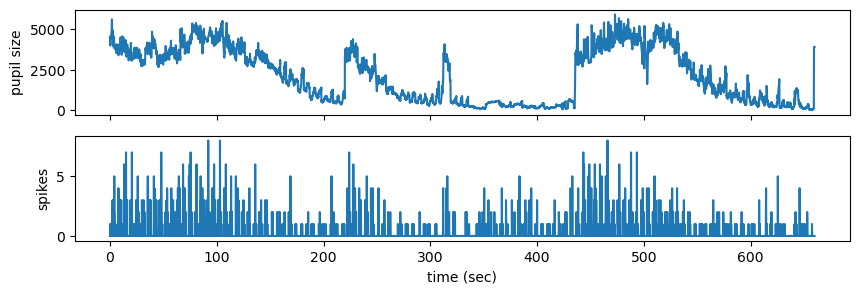

In [19]:
f,ax=plt.subplots(nrows=2, ncols=1, figsize=(10,3), sharex=True)
ax[0].plot(t,pupil_flat)
ax[0].set_ylabel('pupil size')

ax[1].plot(t,spikes_flat)
ax[1].set_ylabel('spikes')
ax[1].set_xlabel('time (sec)');

Just for kicks, what does it look like if you forget to transpose before flattening?

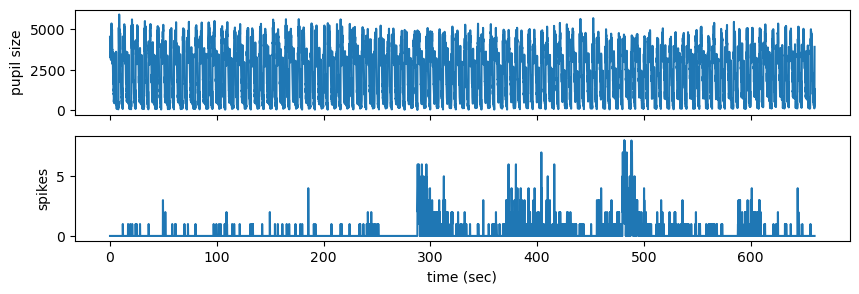

In [20]:
f,ax=plt.subplots(nrows=2, ncols=1, figsize=(10,3), sharex=True)
ax[0].plot(t,pupil.flatten())
ax[0].set_ylabel('pupil size')

ax[1].plot(t,spikes.flatten())
ax[1].set_ylabel('spikes')
ax[1].set_xlabel('time (sec)');

Hopefully it's pretty clear from this quick analysis that spike rate varies with pupil size.

<a id="f531f4ce-af78-4bdf-8155-883771def50d"></a>
# Plot state-dependent PSTHs
<a href="#Overview">Return to overview</a>

Now we want to get a more quantitative sense of the pupil effects. A simple way to do this is to divide the spike data into half, between trials when pupil is large and when it is small. So a few steps:

* identify trials when pupil is smaller vs. larger than the median
* compute the average peri-stimulus time histogram (PSTH, also know as average time-varying response) for the two groups of trials.
* plot the two PSTHs on top of each other.

<a id="c226298d-1768-4018-ba0d-a8eeb8bd037e"></a>
## Exercise 2: compute mean pupil per trial
<a href="#Overview">Return to overview</a>
Create a new array, called `mean_pupil_per_trial` that contains the mean value of the pupil on each trial. Hint: This should have the same length as the number of trials. What's the median pupil size?

In [23]:
# %load "answers/answer_003.txt"
# Answer
mean_pupil_per_trial = pupil.mean(axis=0)
mean_pupil_per_trial.shape

(120,)

We're interested in group the data based on the median. This is a convenient way to divide it into two equal-sized groups. Remember how to do that? Note that the units of pupil (size in pixels) are arbitrary.

In [24]:
pupil_median = np.median(mean_pupil_per_trial)
pupil_median

1848.6995353121138

Let's see if the median makes sense. We can generate a quick plot using things we learned in previous weeks.

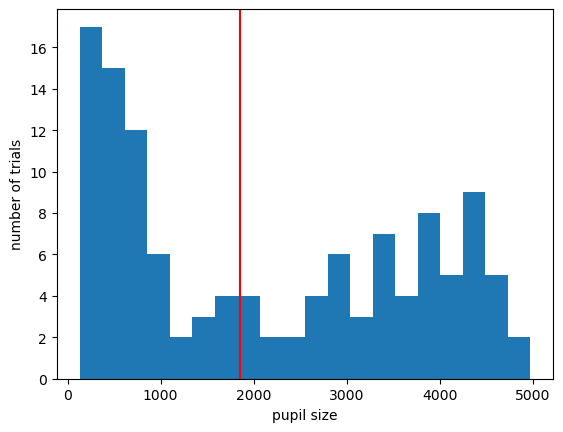

In [26]:
plt.hist(mean_pupil_per_trial, bins=20)
plt.axvline(pupil_median, color='r')
plt.xlabel('pupil size')
plt.ylabel('number of trials');

<a id="d2b9d1e5-ff9c-4358-990c-ed6649f78e8f"></a>
## Exercise 3: compute average response in each pupil group
<a href="#Overview">Return to overview</a>
Now use `mean_pupil_per_trial` to mask out small and large pupil trials and save the results into `pupil_small_mean` and `pupil_large_mean`, respectively.  Remember how to mask?  eg, `A[x>b,:]` will select the rows from array `A` where values in `x` are greater than some threshold `b`. The size of x has to be the same as the number of rows in `A`. Sanity check: how many trials are used to compute each PSTH?

Compute the average PSTH for each group of trials. Save to `pupil_small_psth` and `pupil_large_psth`, respectively.

In [50]:
spikes.shape, spikes_small.shape

((55, 120), (55, 60))

In [51]:
small_trials = mean_pupil_per_trial<pupil_median
large_trials = mean_pupil_per_trial>=pupil_median
# spikes = [time in trial X trial]
spikes_small = spikes[:, mean_pupil_per_trial<pupil_median ]
spikes_large = spikes[:, mean_pupil_per_trial>=pupil_median ]

pupil_small_psth = spikes_small.mean(axis=1)
pupil_big_psth = spikes_large.mean(axis=1)
pupil_big_psth.shape

(55,)

In [52]:
# %load "answers/answer_004.txt"
# Answer
pupil_big_psth = np.mean(spikes[:,mean_pupil_per_trial>pupil_median], axis=1)
pupil_small_psth = np.mean(spikes[:,mean_pupil_per_trial<=pupil_median], axis=1)

np.sum(mean_pupil_per_trial>pupil_median), np.sum(mean_pupil_per_trial<=pupil_median),

(60, 60)

Note: To make sure you use all the data, you might use an `<=` rather than `<`, just in case some trials match the median exactly. You need to be careful, though, as this can generate groups of different sizes.

Now it's pretty straightfoward to plot the data.

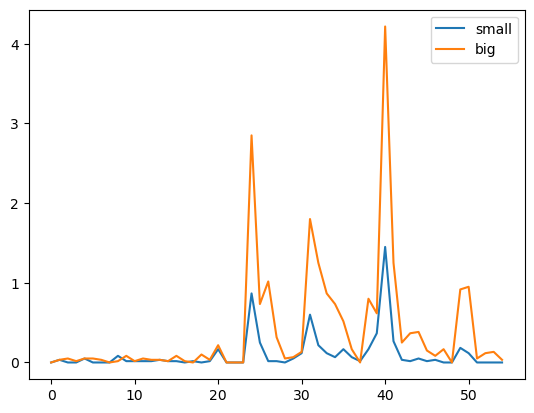

In [80]:
plt.figure()
plt.plot(pupil_small_psth, label='small')
plt.plot(pupil_big_psth, label='big')
plt.legend();

<a id="c0f1b58e-68b5-4588-be4d-fd075de1e3b2"></a>
### Exercise 4: fix the x axis
<a href="#Overview">Return to overview</a>

Oops. I forgot to label the x axis in a way that will make sense to a normal human. Remember how to generate a time vector so that the plot shows time from stimulus onset?  Remember, there's a 2-second pre-stimulus silence. Also, what are the units on the y-axis? Remember how to convert them to spikes per second?

Bonus: consider also providing information about what is big or small.

[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1
  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4]


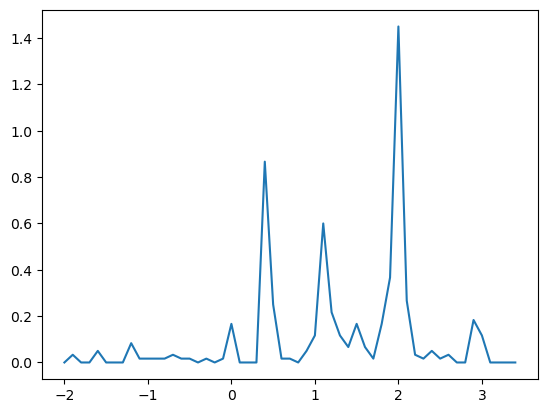

In [55]:
# define time values  -- remember fs tells us how many samples per second
t = np.arange( len(pupil_small_psth)  )  / fs  -2

# plot y as a function of t ... where t is the time corresponding to each PSTH sample
plt.plot(t, pupil_small_psth)
print(t)

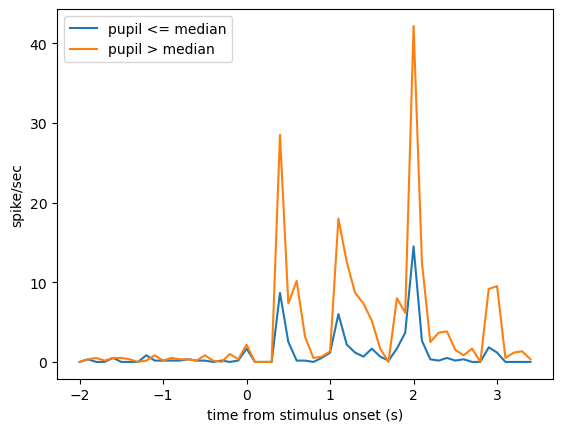

In [61]:
# %load "answers/answer_005.txt"
# Answer
pre_trial_sec = 2
t = np.arange(len(pupil_small_psth))/fs - pre_trial_sec
plt.figure()
plt.plot(t, pupil_small_psth*fs, label='pupil <= median')
plt.plot(t, pupil_big_psth*fs, label='pupil > median')
plt.xlabel('time from stimulus onset (s)')
plt.ylabel('spike/sec')
plt.legend();

<a id="13b7af37-6dc3-486e-ad28-212ac87d7a79"></a>
# Comparing mean evoked spike rate
<a href="#Overview">Return to overview</a>
So the response does seem a lot strong when pupil is large. Now let's confirm it with a permutation test!
* compute mean evoked spike rate on each trial
* compare the distribution of single-tral responses between groups.

<a id="4f094be8-7523-4fbb-b6cd-b92a4bce69b7"></a>
## Exercise 5: compute mean evoked rate on each trial
<a href="#Overview">Return to overview</a>
What was the reponse on each trial?  Slice out the time bins in `spikes` when sound was playing on each trial (remember, 2-sec pre-stimulus silence, 0.5-sec post-stimulus silence) to produce a variable `response` with the mean evoked rate on each trial. 

Then generate two vectors: `response_small` and `response_large`, which contain the mean response on small and large pupil trials, respectively. Remember to mulitply the response by `fs` to get units of spikes/sec! How long is each vector?

In [64]:
t = np.arange(len(pupil_small_psth))/fs - pre_trial_sec
t

array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
       -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,
        0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,
        1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,
        2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4])

In [65]:
stimulus_on = (t>0) & (t<=3)
stimulus_on

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False])

In [71]:
spikes[stimulus_on, :].shape

(30, 120)

In [72]:
response = spikes[stimulus_on, :].mean(axis=0) * fs
response.shape

(120,)

In [73]:
response_small = response[small_trials]
response_small.shape

(60,)

In [75]:
# %load "answers/answer_006.txt"
# Answer
#pre_stimulus_bins = int(2 * fs)
#post_stimulus_bins = int(0.5 * fs)
#response = spikes[pre_stimulus_bins:-post_stimulus_bins,:].mean(axis=0) * fs

t = np.arange(len(pupil_small_psth))/fs - pre_trial_sec
stimulus_on = (t>0) & (t<=3)
response = spikes[stimulus_on, :].mean(axis=0) * fs

response_small = response[mean_pupil_per_trial<=pupil_median]
response_large = response[mean_pupil_per_trial>pupil_median]
response_small.shape, response_large.shape

((60,), (60,))

Now we can compute the mean response in each condition (remember `np.round`?):

In [76]:
np.round(response_small.mean(),3), np.round(response_large.mean(),3)

(1.756, 6.883)

And for statistcal purposes, a simple quanity to think about is the mean difference:

In [77]:
mean_response_difference = np.mean(response_large) - np.mean(response_small)
mean_response_difference

5.127777777777776

Great, so spike rate is a lot higher on large-pupil trials. 

One way people traditionally compare distributions is by their mean and standard error. "Standard error on the mean" (SEM) is the standard deviation divided by the square root of the number of samples.

In [78]:
T = len(response_small)
mean_small = np.mean(response_small)
sem_small = np.std(response_small)/np.sqrt(T)
mean_large = np.mean(response_large)
sem_large = np.std(response_large)/np.sqrt(T)

If the error bars don't overlap, then the means are significantly different with p<0.05. Notice that matplotlib has a convenient `errorbar` function. Take a look at the docs if you want to learn more.

Text(0, 0.5, 'mean response (spk/s)')

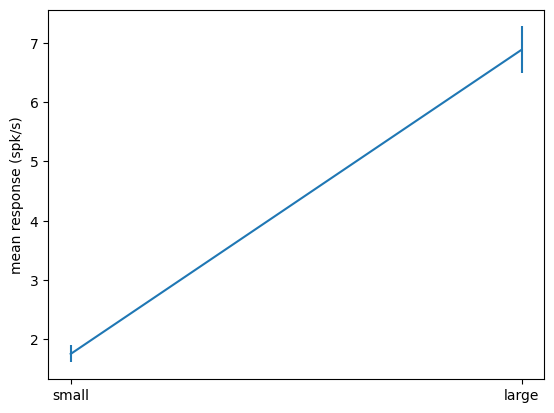

In [79]:
plt.errorbar([1,2],[mean_small, mean_large], [sem_small, sem_large]);
plt.xticks([1,2],['small','large'])
plt.ylabel('mean response (spk/s)')

But this can be deceptive. Let's try the same comparison for the spontaneous spike rate. Can you copy/modify code from above to compute the mean spont rate during the 2 seconds before each stimulus onset? Remember to scale by `fs`!

In [81]:
t = np.arange(len(pupil_small_psth))/fs - pre_trial_sec
pre_stim = (t<0)
spont = spikes[pre_stim, :].mean(axis=0) * fs

spont_small = spont[mean_pupil_per_trial<=pupil_median]
spont_large = spont[mean_pupil_per_trial>pupil_median]
spont_small.shape, spont_large.shape

((60,), (60,))

In [82]:
# %load "answers/answer_007.txt"
# Answer
spont = spikes[:pre_stimulus_bins,:].mean(axis=0) * fs

spont_small = spont[mean_pupil_per_trial<=pupil_median]
spont_large = spont[mean_pupil_per_trial>pupil_median]

Now what do mean +/- SEM look like for those data?

In [83]:
T = len(spont_small)
mean_small = np.mean(spont_small)
sem_small = np.std(spont_small)/np.sqrt(T)
mean_large = np.mean(spont_large)
sem_large = np.std(spont_large)/np.sqrt(T)

0.19166666666666668

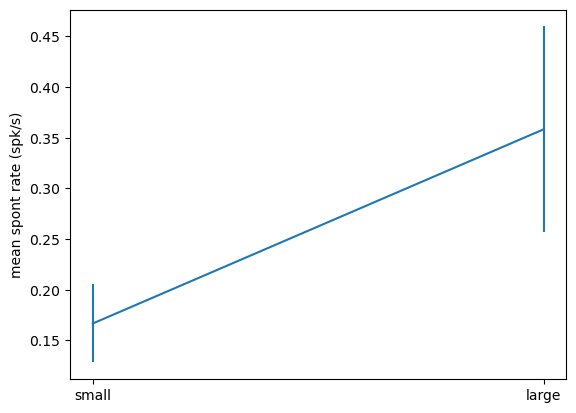

In [84]:
plt.errorbar([1,2],[mean_small, mean_large], [sem_small, sem_large]);
plt.xticks([1,2],['small','large'])
plt.ylabel('mean spont rate (spk/s)');
mean_spont_difference = mean_large-mean_small
mean_spont_difference

They're not overlapping either. Hmm. The PSTH plot does suggest that the spont rate is *slightly* higher on large pupil trials (see above). But is it real? 

First let's look at the single-trial data in more detail.

We've looked as histograms, but what if we want to compare histograms from two different groups?  `np.stack` can be used to combine two length-$N$ vectors into an $N \times 2$ matrix.

(8, 2)


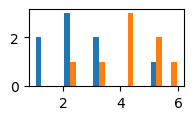

In [90]:
a = np.array([1,1,2,2,2,3,3,5])
b = np.array([2,3,4,4,4,5,5,6])
data = np.stack((a,b), axis=1)
print(data.shape)
plt.figure(figsize=(2,1))
plt.hist(data);

<a id="aee3912b-3435-4741-9e55-29e48c2806da"></a>
## Exercise 6: compare response histograms
<a href="#Overview">Return to overview</a>
Use `np.stack` and `plt.hist` to compare the two response distributions. Remember `response_small` and `response_large` tell use mean evoked spike rate on each small- and large-pupil trial

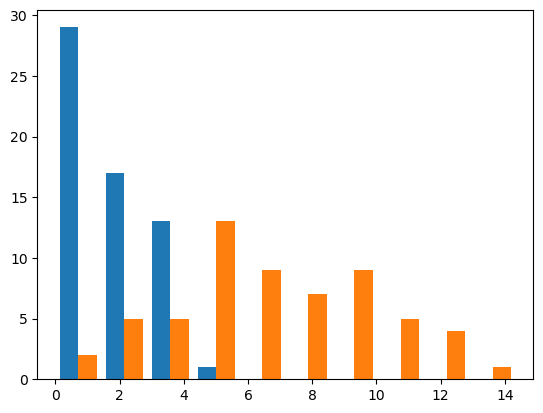

In [92]:
data = np.stack((response_small, response_large  ), axis=1)
plt.hist(data);

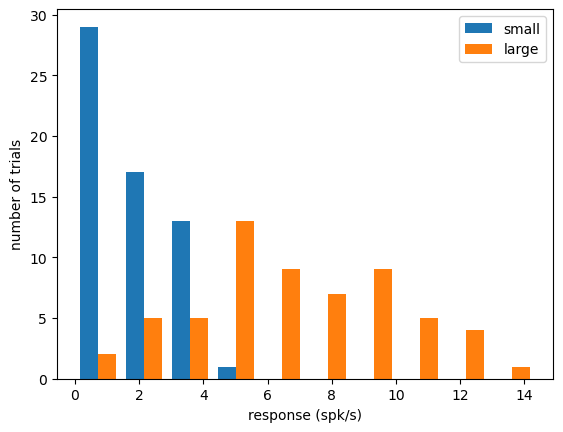

In [95]:
# %load "answers/answer_008.txt"
# Answer
data = np.stack([response_small, response_large], axis=1)
plt.hist(data);
plt.xlabel('response (spk/s)');
plt.ylabel('number of trials');
plt.legend(('small','large'));

These look pretty different. Unlikely that they were produced by chance. Now the same for spont rate:

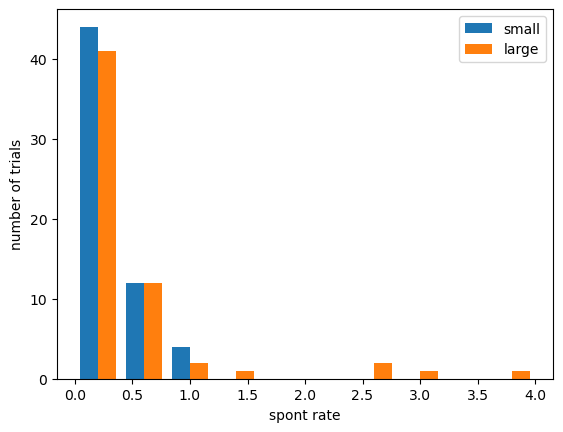

In [96]:
data = np.stack([spont_small, spont_large], axis=1)
plt.hist(data);
plt.xlabel('spont rate');
plt.ylabel('number of trials');
plt.legend(('small','large'));

Is this real? Or could there just have been a few high-spont rate trials by change. This "heavy tailed" distribution is a classic deviation from a Gaussian distribution. The small number of large, asymetric values makes the mean of the large pupil condition large.

<a id="a623b812-038c-45d8-b90d-b9761e91faaf"></a>
# Permute!
<a href="#Overview">Return to overview</a>

Numpy has a bunch of tools for generating random numbers. A convenient funciton for today is `permutation`.

In [125]:
a=np.arange(10)
np.random.permutation(a)

array([6, 4, 0, 5, 3, 1, 7, 8, 9, 2])

<a id="12d44766-1253-4834-9c36-c1e786bc668f"></a>
## Exercise 7: do the shuffle
<a href="#Overview">Return to overview</a>

We want to randomly shuffle the trials included in the small and large pupil groups. An easy wey to do this is to create a permuted copy of `mean_pupil_per_trial`. Call it `shuffled_pupil`. Now using the `response` vector we've already computed to exrtact and recompute the reponse for "small" and "large" groups (`response_small_shuffled` and `response_large_shuffled`). Compute the mean response difference between groups and store it in `mean_response_difference`.

In [128]:
# don't need to recompute this
#response = spikes[stimulus_on, :].mean(axis=0) * fs

response_small = response[mean_pupil_per_trial<=pupil_median]
response_large = response[mean_pupil_per_trial>pupil_median]

# generate permuted data:
shuffled_pupil = np.random.permutation(mean_pupil_per_trial)
response_small_shuffled = response[shuffled_pupil<=pupil_median]
response_large_shuffled = response[shuffled_pupil>pupil_median]


(60,)

In [131]:
# %load "answers/answer_009.txt"
# Answer
shuffled_pupil = np.random.permutation(mean_pupil_per_trial)

response_small_shuffled = response[shuffled_pupil<=pupil_median]
response_large_shuffled = response[shuffled_pupil>pupil_median]
mean_response_difference_shuffled = np.mean(response_large_shuffled) - np.mean(response_small_shuffled)
mean_response_difference_shuffled


0.27222222222222303

For fun, let's plot a histogram of the shuffled data. The shuffled respone distributions are not identical, but they're clearly much more similar than the real data.

Text(0.5, 1.0, 'Shuffled pupil comparison')

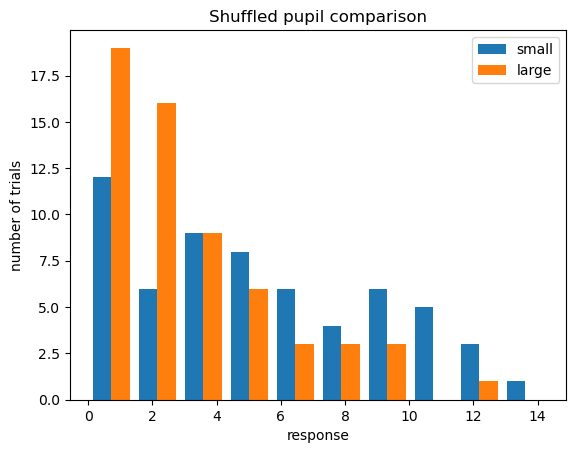

In [653]:
data = np.stack([response_small_shuffled, response_large_shuffled], axis=1)
plt.hist(data);
plt.xlabel('response');
plt.ylabel('number of trials');
plt.legend(('small','large'));
plt.title('Shuffled pupil comparison')

It's important to note that `permutation` is meant to be random. It's supposed to generate a different distribution each time you run it. Try running the two cells above a few times to see how the plot changes.

<a id="3cf0469f-d231-4dae-baec-c070bb0ba92d"></a>
## Exercise 8: multiple permutations
<a href="#Overview">Return to overview</a>

Let's repeat the permutation N=100 times. Write a `for` loop, where on each loop you permute `mean_pupil_per_trial` and compute a new shuffled mean difference between median groups. Save all these means in a length-100 vector `shuffled_distribution`.

In [153]:
mean_response_difference

5.127777777777776

In [652]:
shuffled_pupil = np.random.permutation(mean_pupil_per_trial)

response_small_shuffled = response[shuffled_pupil<=pupil_median]
response_large_shuffled = response[shuffled_pupil>pupil_median]
mean_response_difference_shuffled = np.mean(response_large_shuffled) - np.mean(response_small_shuffled)
mean_response_difference_shuffled

-2.216666666666667

In [654]:
N=100
shuffled_distribution = np.zeros(N)

for i in range(N):
    shuffled_pupil = np.random.permutation(mean_pupil_per_trial)
    
    response_small_shuffled = response[shuffled_pupil<=pupil_median]
    response_large_shuffled = response[shuffled_pupil>pupil_median]
    shuffled_distribution[i] = np.mean(response_large_shuffled) - np.mean(response_small_shuffled)
    

In [665]:
# %load "answers/answer_010.txt"
# Answer
N=10000
shuffled_distribution = np.zeros(N)
for i in range(N):
    shuffled_pupil = np.random.permutation(mean_pupil_per_trial)
    response_small_shuffled = response[shuffled_pupil<=pupil_median]
    response_large_shuffled = response[shuffled_pupil>pupil_median]
    shuffled_distribution[i] = np.mean(response_large_shuffled) - np.mean(response_small_shuffled)
    

Now, we plot a histogram of the shuffled differeneces. Don't you love histograms?

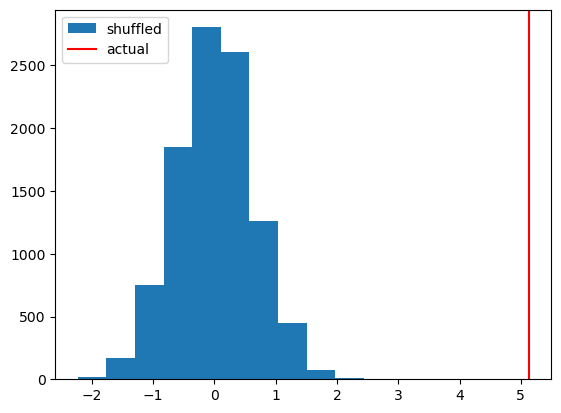

In [666]:
plt.hist(shuffled_distribution, label='shuffled')
plt.axvline(mean_response_difference, color='r', label='actual')
plt.legend()

Just to be totally unbiased, we might not want to make assumptions about which condition (big or small pupil) should be larger. In that case, we want to perform a two-tailed test. Intuitively, this means considering the absolute value of the relevant numbers:

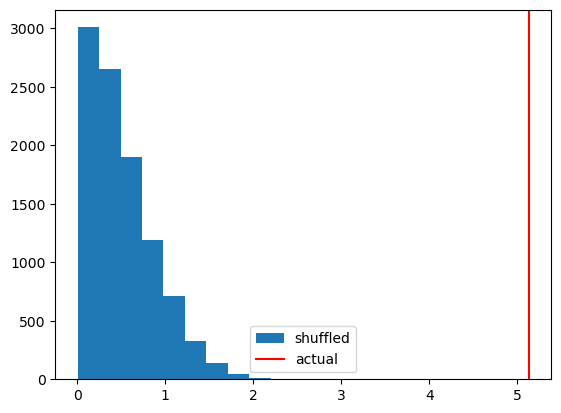

In [667]:
plt.hist(np.abs(shuffled_distribution), label='shuffled')
plt.axvline(np.abs(mean_response_difference), color='r', label='actual')
plt.legend()

Still pretty obvious that the actual mean difference was not generated by chance, right?

Now we can calculate a p-value directly! $p$ is the probability that the actual mean difference was generated by the shuffled distribution. Let's stick with a "two-tailed" test, which tests how likely the **absolute** value of the mean was larger than the actual value. Note that we have to include the actual value in this comparison, so that $p$ is never exactly zero. Thus we `append` the actual measure to the shuffled distribution before measuring p.

In [668]:
effective_distribution = np.append(shuffled_distribution, mean_response_difference)

total_N = len(effective_distribution)
greater_equal_N = np.sum(np.abs(effective_distribution) >= np.abs(mean_response_difference))
p = greater_equal_N / total_N
print (greater_equal_N, total_N, p)


1 10001 9.999000099990002e-05


Now let's try it for the spont data

In [669]:
N=100
shuffled_distribution = np.zeros(N)

for i in range(N):
    shuffled_pupil = np.random.permutation(mean_pupil_per_trial)
    
    response_small_shuffled = spont[shuffled_pupil<=pupil_median]
    response_large_shuffled = spont[shuffled_pupil>pupil_median]
    shuffled_distribution[i] = np.mean(response_large_shuffled) - np.mean(response_small_shuffled)


In [679]:
# %load "answers/answer_011.txt"
# Answer
N=1000
shuffled_distribution = np.zeros(N)
for i in range(N):
    shuffled_pupil = np.random.permutation(mean_pupil_per_trial)
    spont_small_shuffled = spont[shuffled_pupil<=pupil_median]
    spont_large_shuffled = spont[shuffled_pupil>pupil_median]
    shuffled_distribution[i] = np.mean(spont_large_shuffled) - np.mean(spont_small_shuffled)

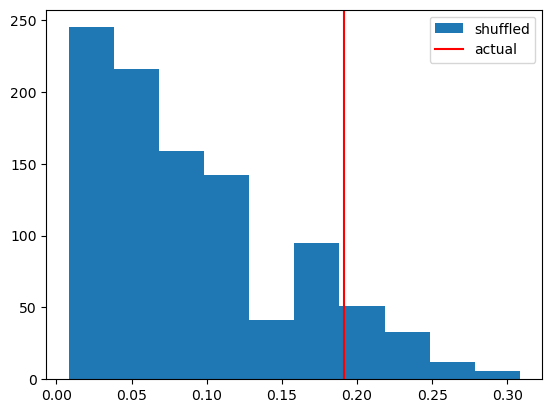

In [680]:
plt.hist(np.abs(shuffled_distribution), label='shuffled')
plt.axvline(np.abs(mean_spont_difference), color='r', label='actual')
plt.legend()

In [681]:
effective_distribution = np.append(shuffled_distribution, mean_spont_difference)

total_N = len(effective_distribution)
greater_equal_N = np.sum(np.abs(effective_distribution) >= np.abs(mean_spont_difference))
p = greater_equal_N / total_N
p


0.1028971028971029

Ok, no such luck with spont.

<a id="e0585c21-27c5-4c6e-93e0-11b01825991d"></a>
# Write a function to save time and space
<a href="#Overview">Return to overview</a>

This permutation code is cool, but a bit cumbersome to copy and paste all the time. Let's make a compact function that performs the permutation test.  You remember about functions from week 1? 

In [ ]:
def compute_sum(a,b):
    """
    compute the sum of two numbers
    inputs:
       a, b: numbers
    output:
       c: the sum of a and b
    """
    c = a+b
    return c

In [ ]:
compute_sum(1,2)

Notice that the function includes a "docstring", bounded by """ and """ immediately below the `def`. What happens if I look for help?

In [ ]:
compute_sum?

We want a function that we can pass our two distributions, `response_small` and `response_large`, and get back a $p$ value telling us how likely they are to have different means.

To make the function more general purpose, let's figure out a what to permute without any knowledge of pupil size. How do we do that? We can simply append the distributions together, shuffle, and split the shuffled distribution in half. Do you get what the slicing is doing when you create the two shuffled distributions?

In [ ]:
all_data = np.append(response_small, response_large)
s = np.random.permutation(all_data)
response_small_shuffled = s[:len(response_small)]
response_large_shuffled = s[len(response_small):]
response_small_shuffled.shape, response_large_shuffled.shape

<a id="8e91c3c6-8016-4181-aff6-47f0687ed4b7"></a>
## Exercise 9: write a permutation test function
<a href="#Overview">Return to overview</a>

Write a function, `my_permutation_test`. Given two distributions, `a` and `b`, and a permutation count `N`, perform `N` shuffles, count the number of times the shuffled absolute difference is greater than the actual absolute difference, and return p. Bonus: Provide a docstring!

In [683]:
# %load "answers/answer_012.txt"
# Answer
def my_permutation_test(a,b,N=100):
    """
    use permutation to test whether the means of a and b are significantly different.
    inputs:
       a, b: 1-D distributions of data
       N: number of permutations
    outputs:
       p: p-value, how likely the absolute value of the mean difference occured by chance
    """
    # first, compute the shuffled mean differences
    shuffled_distribution = np.zeros(N)
    for i in range(N):
        all_data = np.append(a, b)
        s = np.random.permutation(all_data)
        a_shuffled = s[:len(a)]
        b_shuffled = s[len(a):]
        shuffled_distribution[i] = np.mean(a_shuffled) - np.mean(b_shuffled)
    
    # now compute p
    effective_distribution = np.append(shuffled_distribution, a.mean()-b.mean())

    total_N = len(effective_distribution)
    greater_equal_N = np.sum(np.abs(effective_distribution) >= np.abs(a.mean()-b.mean()))
    p = greater_equal_N / total_N
    
    return p

Now test it out!

In [684]:
my_permutation_test(response_small,response_large,100)

0.009900990099009901

What happens if I try it with the spont data?

In [685]:
my_permutation_test(spont_small,spont_large,100)

0.12871287128712872

What happens if you change `N`?

In [686]:
my_permutation_test(response_small,response_large,1000)

0.000999000999000999

Notice that the estimate of p is smaller, basically at the lowest possible value that can be obtained for this number of permutations, N. How maybe permuations does it take to get a p that's not the minimum? Is it worth finding out?

So rule of thumb: Perform as many permutations as you need to get a **stable** p value. Once p is not the minimum, it will not get much smaller with larger N. You can try that with the spont data 

In [687]:
my_permutation_test(spont_small,spont_large,10000)

0.10228977102289771

To get a really small p, you need to perform a lot of permutations. For really big data sets, the computation can be very slow (and unnecessary) for large N.

<a id="6568c72a-e3f7-44b3-90a5-42f764499447"></a>
# Permutation test for an arbitrary measurement
<a href="#Overview">Return to overview</a>

What if you want to test significance of something besides a mean. How do you do that?  One option is to permute!

<a id="317812bc-5e59-4a28-a6c9-69df0c6b7946"></a>
## Correlation coefficient
<a href="#Overview">Return to overview</a>

Notice that the pupil and spike data are both continuously varying. Maybe we want to measure the correlation coefficient between them, rather than the mean difference between two somewhat arbitrary groups.

Text(0, 0.5, 'spikes/sec')

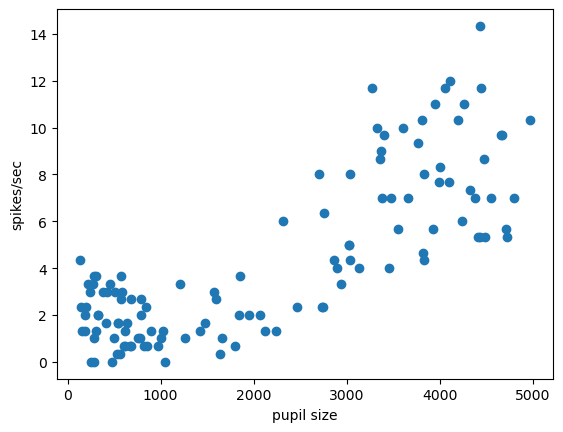

In [688]:
plt.scatter(mean_pupil_per_trial, response);
plt.xlabel('pupil size')
plt.ylabel('spikes/sec')

We can use `np.corrcoef` to measure a correlation coefficient. 

In [690]:
np.corrcoef(mean_pupil_per_trial, response)[0,1]

0.8007170275938229

Kind of randomly, this returns a matrix, with the autocorrelation of each signal on the diagonal and the correlation between them in the off-diagonals. There is a reason for this, but for today's purposes, let's just grab the relevant number:

In [691]:
cc = np.corrcoef(mean_pupil_per_trial, response)[0,1]
print("correlation between pupil and spike rate:", np.round(cc,3))

correlation between pupil and spike rate: 0.801


<a id="9ab41349-5145-4fba-850e-f32a48f134f3"></a>
## Generate a custom metric function
<a href="#Overview">Return to overview</a>

In our test we have been measuring the significance of absolute mean difference. (Note in passing that if you don't use `abs`, you can perform one-tailed test.) Let's make a function that computes the absolute mean difference in one step:

In [692]:
def my_absolute_mean_difference(a,b):
    """
    Helper function for flexible_permutation_test, compute the absolute mean difference between a and b
    """
    m = np.abs(a.mean()-b.mean())
    return m

my_absolute_mean_difference(response_small, response_large)

5.127777777777776

Simply executing `my_absolute_mean_difference` will give you some useuful information.

In [693]:
my_absolute_mean_difference

<function __main__.my_absolute_mean_difference(a, b)>

And you can ask for help, same as for the funciton above.

In [694]:
my_absolute_mean_difference?

Signature: my_absolute_mean_difference(a, b)
Docstring: Helper function for flexible_permutation_test, compute the absolute mean difference between a and b
File:      /var/folders/1v/z7159g391sd3b__mmrk2g4kh0000gn/T/ipykernel_8843/175338710.py
Type:      function

Why do this? Cool thing about Python (and many other languages), you can pass a function as a parameter into another function. So now we can write a permutation test that evaluates an abitrary statistic. Let's modify the function from above. We replace the calls to `np.mean()` with a new parameter `myfunc`. 

This function is turning into something of a beast, but you should be able to figure out what's going on.

In [695]:
def flexible_permutation_test(a, b, myfunc, N=100, verbose=False):
    """
    Permutation to test whether the the value of myfunc(a,b) is significantly greater 
    than expected by chance.
    inputs:
       a, b: 1-D distributions of data
       myfunc: user-defined function such that stat=myfunc(a,b) returns a scalar value
            stat, which can be evaluated over permutations of a and b
       N: number of permutations
       verbose: plot a histrogram of the shuffled data, helpful for debugging.
    outputs:
       p: p-value, how likely the actual value occurred by chance
    """
    # first, compute the shuffled mean differences
    shuffled_distribution = np.zeros(N)
    for i in range(N):
        all_data = np.append(a, b)
        s = np.random.permutation(all_data)
        a_shuffled = s[:len(a)]
        b_shuffled = s[len(a):]
        shuffled_distribution[i] = myfunc(a_shuffled,b_shuffled)
    
    # now compute p
    actual_value = myfunc(a,b)
    effective_distribution = np.append(shuffled_distribution, actual_value)

    total_N = len(effective_distribution)
    # Note that we don't use absolute values here because we want to leave 
    # flexibility around one- vs. two-tailed tests
    greater_equal_N = np.sum(effective_distribution >= actual_value)
    p = greater_equal_N / total_N
    
    if verbose:
        plt.figure()
        plt.hist(shuffled_distribution, label='shuffled')
        plt.axvline(actual_value, color='r', label='acutal')
        plt.xlabel('statistic')
        plt.ylabel('count')
        plt.legend()
        
    return p

Now we pass `my_absolute_mean_difference` to this new function.

In [696]:
flexible_permutation_test(response_small, response_large, my_absolute_mean_difference, N=100)

0.009900990099009901

Notice the `verbose` option. What does that do?

0.009900990099009901

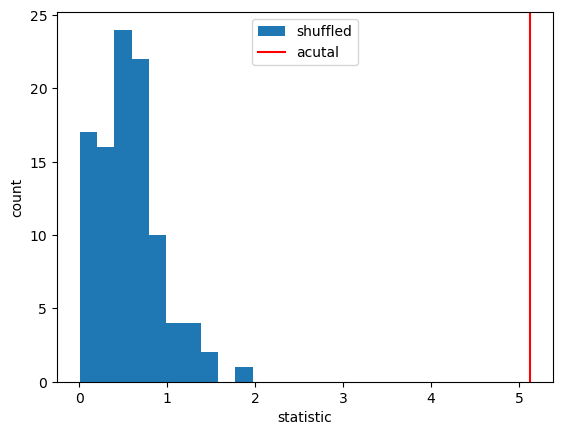

In [698]:
# %load "answers/answer_013.txt"
# Answer
flexible_permutation_test(response_small, response_large, my_absolute_mean_difference, 
                          N=100, verbose=True)

<a id="a48a1233-3876-4811-a1a1-b334b11a5757"></a>
## Exercise 10: custom correlation coefficient function
<a href="#Overview">Return to overview</a>

Now, define a function `my_correlation_coefficient` that returns the correlation coefficient as a single number (ie, the relevant entry in the matrix returned by `np.corrcoef`). Copying the format from the `def` of `my_absolute_mean_difference`.

In [701]:
# %load "answers/answer_014.txt"
# Answer
def my_correlation_coefficient(a,b):
    """
    compute the correlation coefficient between a and b.
    """
    cc = np.corrcoef(a, b)[0,1]
    return cc

Now test it here:

In [702]:
my_correlation_coefficient(mean_pupil_per_trial, response)

0.8007170275938229

And now, try passing it to `flexible_permutation_test`!

0.009900990099009901

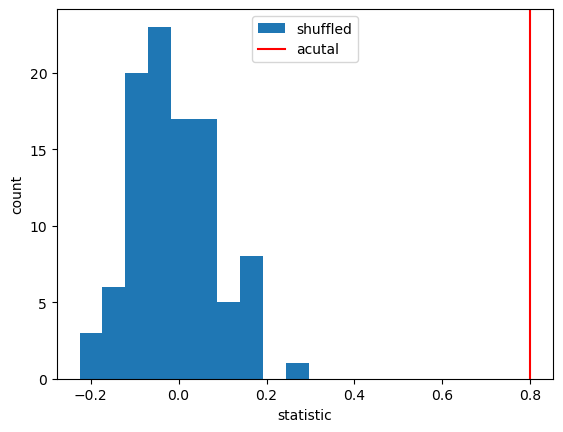

In [703]:
flexible_permutation_test(mean_pupil_per_trial, response, my_correlation_coefficient, N=100, verbose=True)

And you can try the same thing for `spont`

0.019801980198019802

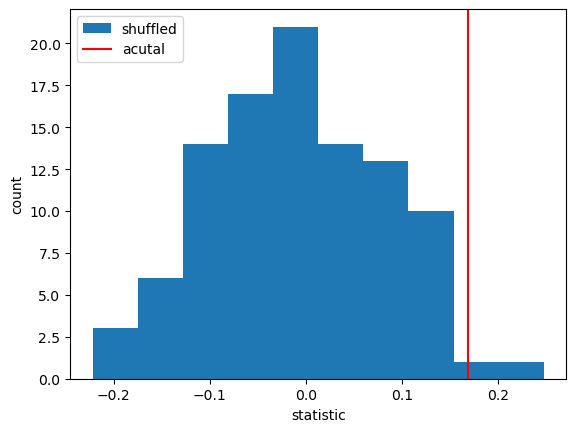

In [704]:
flexible_permutation_test(mean_pupil_per_trial, spont, my_correlation_coefficient, 100, True)

... or even for the raw traces! Pay attention to values on the $x$-axis. Notice that the overall correlation in this case is smaller (because of noise), but the correlation of the shuffled data is tiny.

0.009900990099009901

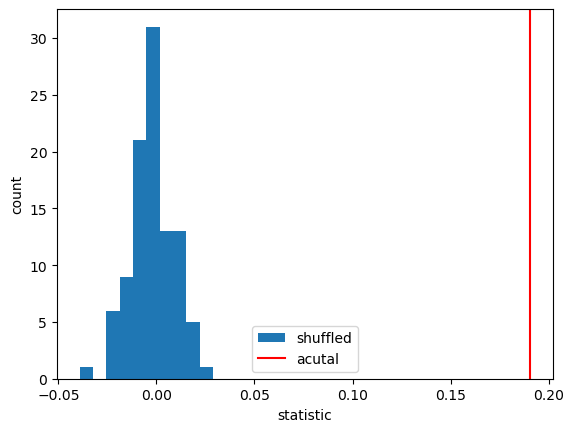

In [705]:
flexible_permutation_test(pupil.flatten(), spikes.flatten(), 
                          my_correlation_coefficient, 100, True)

<a id="78c5bbbe-3a72-4113-ac99-d7336804899a"></a>
# Existing resources for permutation statistics
<a href="#Overview">Return to overview</a>

Note that for comparisons of mean, like the one described above, there are built-in functions, along with a bunch of other more sophisticated tests, in `scipy.stats`.

For example, a Student's T test can be peformed with permutations, giving very similar results to our permutation test. (The 0.0 pvalue indicates that 

In [ ]:
print("Evoked:", ss.ttest_ind(response_small, response_large, permutations=1000))
print("Spont:",ss.ttest_ind(spont_small, spont_large, permutations=1000))

The Wilcoxon signed-rank test does the same thing, more or less, for medians.

In [ ]:
print("Evoked:", ss.wilcoxon(response_small, response_large))
print("Spont:",ss.wilcoxon(spont_small, spont_large))